    points  assists  rebounds
0     18.0      3.0        15
1     19.0      4.0        14
2     14.0      5.0        10
3     14.0      4.0         8
4     11.0      7.0        14
5     20.0      8.0        13
6     28.0      7.0         9
7     30.0      6.0         5
8     31.0      9.0         4
9     35.0     12.0        11
10    33.0     14.0         6
11    25.0      9.0         5
12    25.0      4.0         3
13    27.0      3.0         8
14    29.0      4.0        12
15    30.0     12.0         7
16    19.0     15.0         6
17    23.0     11.0         5


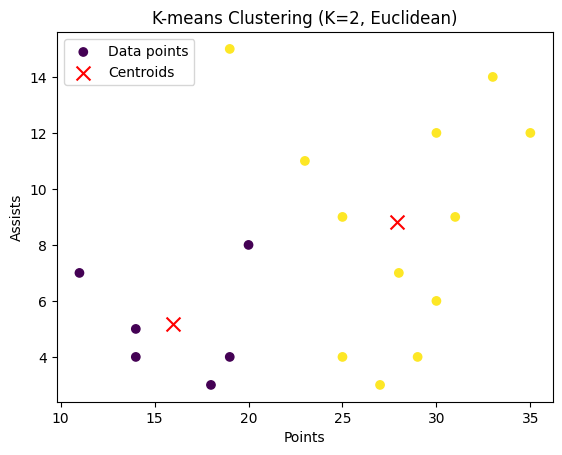

SSE for K=2: 601.0


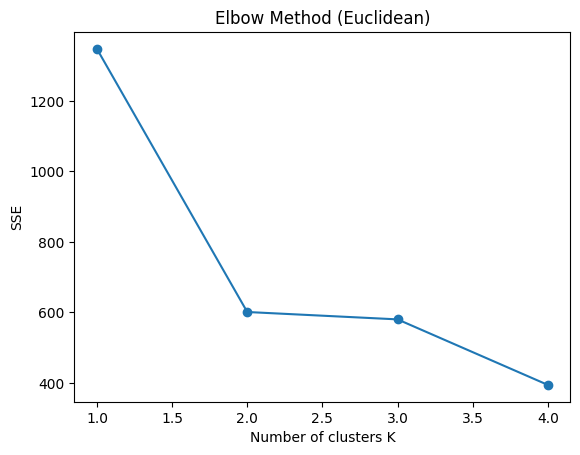

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data from the image
data = {
    'points': [18.0, 19.0, 14.0, 14.0, 11.0, 20.0, 28.0, 30.0, 31.0, 35.0,
               33.0, 25.0, 25.0, 27.0, 29.0, 30.0, 19.0, 23.0],
    'assists': [3.0, 4.0, 5.0, 4.0, 7.0, 8.0, 7.0, 6.0, 9.0, 12.0,
                14.0, 9.0, 4.0, 3.0, 4.0, 12.0, 15.0, 11.0],
    'rebounds': [15, 14, 10, 8, 14, 13, 9, 5, 4, 11,
                 6, 5, 3, 8, 12, 7, 6, 5]
}
df = pd.DataFrame(data)
print(df)

def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def manhattan_distance(a, b):
    return np.sum(np.abs(a - b))

def minkowski_distance(a, b, p=3):
    return np.sum(np.abs(a - b) ** p) ** (1 / p)

def kmeans_manual(X, k, distance_func, max_iters=100):
    np.random.seed(42)
    # Randomly initialize centroids
    centroids = X[np.random.choice(range(X.shape[0]), k, replace=False)]
    for _ in range(max_iters):
        # Assign clusters
        clusters = []
        for x in X:
            distances = [distance_func(x, centroid) for centroid in centroids]
            clusters.append(np.argmin(distances))
        clusters = np.array(clusters)
        # Update centroids
        new_centroids = np.array([X[clusters == i].mean(axis=0) if np.any(clusters == i) else centroids[i] for i in range(k)])
        # Check for convergence
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    return clusters, centroids

X = df.values
clusters, centroids = kmeans_manual(X, 2, euclidean_distance)

plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', label='Data points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.xlabel('Points')
plt.ylabel('Assists')
plt.title('K-means Clustering (K=2, Euclidean)')
plt.legend()
plt.show()

def compute_sse(X, clusters, centroids, distance_func):
    sse = 0
    for i, centroid in enumerate(centroids):
        sse += np.sum([distance_func(x, centroid) ** 2 for x in X[clusters == i]])
    return sse

# Example for K=2
sse = compute_sse(X, clusters, centroids, euclidean_distance)
print(f"SSE for K=2: {sse}")

sse_list = []
K_range = range(1, 5)
for k in K_range:
    clusters, centroids = kmeans_manual(X, k, euclidean_distance)
    sse = compute_sse(X, clusters, centroids, euclidean_distance)
    sse_list.append(sse)

plt.plot(list(K_range), sse_list, marker='o')
plt.xlabel('Number of clusters K')
plt.ylabel('SSE')
plt.title('Elbow Method (Euclidean)')
plt.show()